### KMeansClustering - Grouping Data

In [9]:
#Required Imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

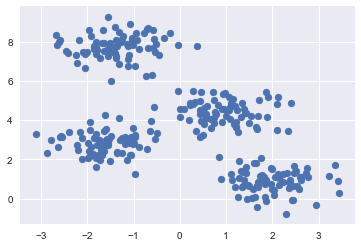

In [10]:
#Creating Data
data_points, groups = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.6)
plt.scatter(data_points[:,0],data_points[:,1])

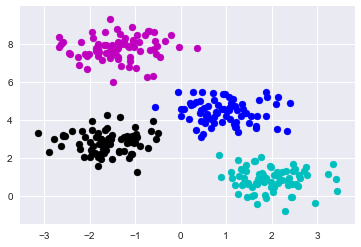

In [11]:
# After Applying The Clustering Alg Our Data Should Look Something Like This.
colors = ["b", "c", "k", "m", "g"]
for i in range(len(data_points)):
    plt.scatter(data_points[i][0],data_points[i][1], color=colors[groups[i]])

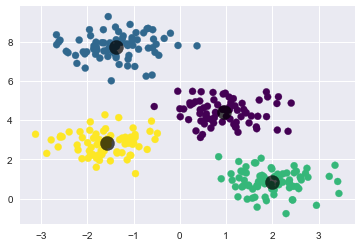

In [59]:
# KMeans Implementation
from sklearn.metrics import pairwise_distances_argmin
n_clusters = 4

def find_clusters(n_clusters):
    rng = np.random.RandomState(seed=2)
    i = rng.permutation(data_points.shape[0])[:n_clusters]
    centers = data_points[i]

    while True:
        labels = pairwise_distances_argmin(data_points, centers)
        new_centers = np.array([data_points[labels==i].mean(0) for i in range(n_clusters)])
    
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(4)

plt.scatter(data_points[:,0], data_points[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.7)